Author: Fitria Dwi Wulandari (fitria.dwi71@ui.ac.id) - September 9, 2021

# Data Analysis of COVID-19 in the World and ASEAN

### Data Loading

In [1]:
# Import libraries
import numpy as np
import pandas as pd
pd.set_option("display.max_columns", None)

In [2]:
# Import dataset
covid19_url = "https://dqlab.id/data/covid19_worldwide_2020.json"
covid19 = pd.read_json(covid19_url)

print("Dataset size: %d columns dan %d rows.\n" % covid19.shape)
print("Top 5 data:\n",covid19.head(5))

Dataset size: 61900 columns dan 6 rows.

Top 5 data:
         date  daily_confirmed_cases  daily_deaths  confirmed_cases  deaths  \
0 2020-03-20                      1             0                1       0   
1 2020-03-21                      0             0                1       0   
2 2020-03-22                      1             0                2       0   
3 2020-03-23                      0             0                2       0   
4 2020-03-24                      0             0                2       0   

  geo_id  
0     TD  
1     TD  
2     TD  
3     TD  
4     TD  


### Reformat Data Frame

In [3]:
print("Information of initial data frame :")
covid19.info()

Information of initial data frame :
<class 'pandas.core.frame.DataFrame'>
Int64Index: 61900 entries, 0 to 61899
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   date                   61900 non-null  datetime64[ns]
 1   daily_confirmed_cases  61900 non-null  int64         
 2   daily_deaths           61900 non-null  int64         
 3   confirmed_cases        61900 non-null  int64         
 4   deaths                 61900 non-null  int64         
 5   geo_id                 61625 non-null  object        
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 3.3+ MB


`date` column already of type numpy.datetime64[ns], then this column can be set as index for **covid19** data frame.

In [4]:
covid19 = covid19.set_index("date").sort_index()

print("\nInformation of data frame after reformatting:")
covid19.info()


Information of data frame after reformatting:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 61900 entries, 2019-12-31 to 2020-12-14
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   daily_confirmed_cases  61900 non-null  int64 
 1   daily_deaths           61900 non-null  int64 
 2   confirmed_cases        61900 non-null  int64 
 3   deaths                 61900 non-null  int64 
 4   geo_id                 61625 non-null  object
dtypes: int64(4), object(1)
memory usage: 2.8+ MB


### Handling Missing Values

Next, we will eliminate rows from data that are detected have missing values.

In [5]:
print("The number of Missing Values for each columns:")
print(covid19.isna().sum())

covid19.dropna(inplace=True)

print("\nThe number of Missing Values for each columns after imputation:")
print(covid19.isna().sum())

The number of Missing Values for each columns:
daily_confirmed_cases      0
daily_deaths               0
confirmed_cases            0
deaths                     0
geo_id                   275
dtype: int64

The number of Missing Values for each columns after imputation:
daily_confirmed_cases    0
daily_deaths             0
confirmed_cases          0
deaths                   0
geo_id                   0
dtype: int64


### Countries Data Loading

In [6]:
countries_url = "https://dqlab.id/data/country_details.json"
countries = pd.read_json(countries_url)
print(countries.head())

  geo_id country_name
0     TD         Chad
1     CU         Cuba
2     FJ         Fiji
3     GU         Guam
4     IR         Iran


### Merge Covid19 Data dan Countries Data

In [7]:
covid_merge = pd.merge(covid19.reset_index(), countries, on="geo_id").set_index("date")
print(covid_merge.head())

            daily_confirmed_cases  daily_deaths  confirmed_cases  deaths  \
date                                                                       
2019-12-31                      0             0                0       0   
2020-01-01                      0             0                0       0   
2020-01-02                      0             0                0       0   
2020-01-03                      0             0                0       0   
2020-01-04                      0             0                0       0   

           geo_id country_name  
date                            
2019-12-31     IN        India  
2020-01-01     IN        India  
2020-01-02     IN        India  
2020-01-03     IN        India  
2020-01-04     IN        India  


Note: **covid19** data frame has an index on the `date` column, so it needs .reset_index()). After the merge, the index can be set back to the `date` column.

### Calculating Fatality Ratio

Fatality ratio can be calculated by dividing between the `deaths` and `confirmed_cases` columns.

In [8]:
covid_merge["fatality_ratio"] = covid_merge["deaths"]/covid_merge["confirmed_cases"]
print(covid_merge.head())

            daily_confirmed_cases  daily_deaths  confirmed_cases  deaths  \
date                                                                       
2019-12-31                      0             0                0       0   
2020-01-01                      0             0                0       0   
2020-01-02                      0             0                0       0   
2020-01-03                      0             0                0       0   
2020-01-04                      0             0                0       0   

           geo_id country_name  fatality_ratio  
date                                            
2019-12-31     IN        India             NaN  
2020-01-01     IN        India             NaN  
2020-01-02     IN        India             NaN  
2020-01-03     IN        India             NaN  
2020-01-04     IN        India             NaN  


### Countries with the Highest Fatality Ratio

In [9]:
top_20_fatality_rate = covid_merge.sort_values(by='fatality_ratio', ascending=False).head(20)
print(top_20_fatality_rate[["geo_id","country_name","fatality_ratio"]])

           geo_id country_name  fatality_ratio
date                                          
2020-03-15     SD        Sudan             1.0
2020-02-20     IR         Iran             1.0
2020-03-16     GT    Guatemala             1.0
2020-03-13     GY       Guyana             1.0
2020-03-18     SD        Sudan             1.0
2020-03-17     SD        Sudan             1.0
2020-03-16     SD        Sudan             1.0
2020-02-03     PH  Philippines             0.5
2020-02-05     PH  Philippines             0.5
2020-02-04     PH  Philippines             0.5
2020-03-28     NI    Nicaragua             0.5
2020-02-02     PH  Philippines             0.5
2020-03-24     ZW     Zimbabwe             0.5
2020-03-24     GM       Gambia             0.5
2020-03-19     SD        Sudan             0.5
2020-03-20     SD        Sudan             0.5
2020-03-21     SD        Sudan             0.5
2020-03-22     SD        Sudan             0.5
2020-03-23     SD        Sudan             0.5
2020-03-24   

### The Highest Fatality Ratio in August 2020

In [10]:
# Number of cases in august
covid_merge_august = covid_merge.loc["2020-08"].groupby("country_name").sum()
# Calculating fatality ratio in august
covid_merge_august["fatality_ratio"] = covid_merge_august["deaths"]/covid_merge_august["confirmed_cases"]
# Countries with the highest fatality ratio in august
top_20_fatality_rate_on_august = covid_merge_august.sort_values(by="fatality_ratio", ascending=False).head(20)
print("Countries with the Highest Fatality Ratio in August 2020:\n",top_20_fatality_rate_on_august["fatality_ratio"])

Countries with the Highest Fatality Ratio in August 2020:
 country_name
Yemen                     0.286473
Italy                     0.138619
France                    0.137979
United_Kingdom            0.130228
Belgium                   0.125079
Hungary                   0.122820
Netherlands               0.099309
Mexico                    0.099092
Jersey                    0.088677
Spain                     0.079746
Chad                      0.078870
Montserrat                0.076923
Canada                    0.073963
Sweden                    0.071475
Isle_of_Man               0.071429
British_Virgin_Islands    0.066239
Ireland                   0.065030
Sudan                     0.064250
Liberia                   0.063944
Ecuador                   0.061031
Name: fatality_ratio, dtype: float64


### Visualization of the Country with the Highest Fatality Ratio in August 2020

In [11]:
# Import libraries
import matplotlib.pyplot as plt
import seaborn as sns

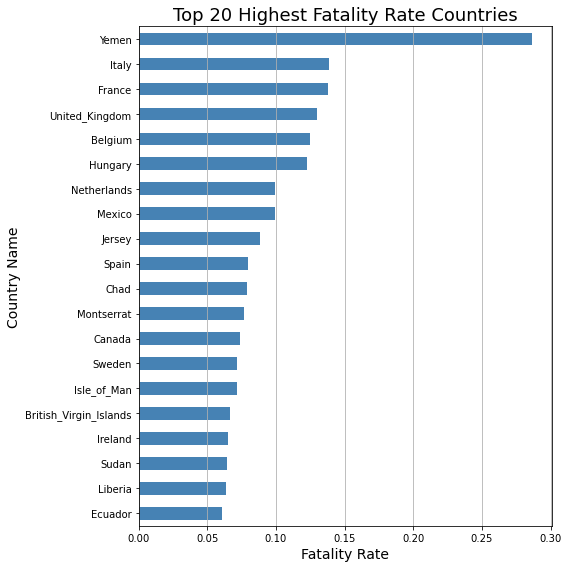

In [12]:
plt.figure(figsize=(8,8))
top_20_fatality_rate_on_august["fatality_ratio"].sort_values().plot(kind="barh", color="steelblue")
plt.title("Top 20 Highest Fatality Rate Countries", fontsize=18, color="k")
plt.xlabel("Fatality Rate", fontsize=14)
plt.ylabel("Country Name", fontsize=14)
plt.grid(axis="x")
plt.tight_layout()
plt.show()

It can be seen that Yemen has the largest fatality ratio compared to other countries in August 2020.

### COVID-19 Case in ASEAN 

In [13]:
asean_country_id = ["ID", "MY", "SG", "TH", "VN"]
filter_list = [(covid_merge["geo_id"]==country_id).to_numpy() for country_id in asean_country_id]
filter_array = np.column_stack(filter_list).sum(axis=1, dtype="bool")
covid_merge_asean = covid_merge[filter_array].sort_index()

print("Check unique value in column 'country_name':", covid_merge_asean["country_name"].unique())
print(covid_merge_asean.head())

Check unique value in column 'country_name': ['Malaysia' 'Vietnam' 'Thailand' 'Singapore' 'Indonesia']
            daily_confirmed_cases  daily_deaths  confirmed_cases  deaths  \
date                                                                       
2019-12-31                      0             0                0       0   
2019-12-31                      0             0                0       0   
2019-12-31                      0             0                0       0   
2019-12-31                      0             0                0       0   
2019-12-31                      0             0                0       0   

           geo_id country_name  fatality_ratio  
date                                            
2019-12-31     MY     Malaysia             NaN  
2019-12-31     VN      Vietnam             NaN  
2019-12-31     TH     Thailand             NaN  
2019-12-31     SG    Singapore             NaN  
2019-12-31     ID    Indonesia             NaN  


### When was the First Case of COVID-19 Popped Up in ASEAN?

In [14]:
print("The first case popped up in ASEAN countries:")
for country_id in asean_country_id:
    asean_country = covid_merge_asean[covid_merge_asean["geo_id"]==country_id]
    first_case = asean_country[asean_country["confirmed_cases"]>0][["confirmed_cases","geo_id","country_name"]]
print(first_case.head(1))

The first case popped up in ASEAN countries:
            confirmed_cases geo_id country_name
date                                           
2020-01-24                2     VN      Vietnam


### Covid-19 cases in March 2020

In [15]:
covid_merge_asean_march_onward = covid_merge_asean[covid_merge_asean.index>="2020-03-01"]
print(covid_merge_asean_march_onward.head())

            daily_confirmed_cases  daily_deaths  confirmed_cases  deaths  \
date                                                                       
2020-03-01                      0             1               42       1   
2020-03-01                      4             0              102       0   
2020-03-01                      0             0               16       0   
2020-03-01                      0             0                0       0   
2020-03-01                      0             0               25       0   

           geo_id country_name  fatality_ratio  
date                                            
2020-03-01     TH     Thailand         0.02381  
2020-03-01     SG    Singapore         0.00000  
2020-03-01     VN      Vietnam         0.00000  
2020-03-01     ID    Indonesia             NaN  
2020-03-01     MY     Malaysia         0.00000  


### Visualization of COVID-19 Cases in ASEAN

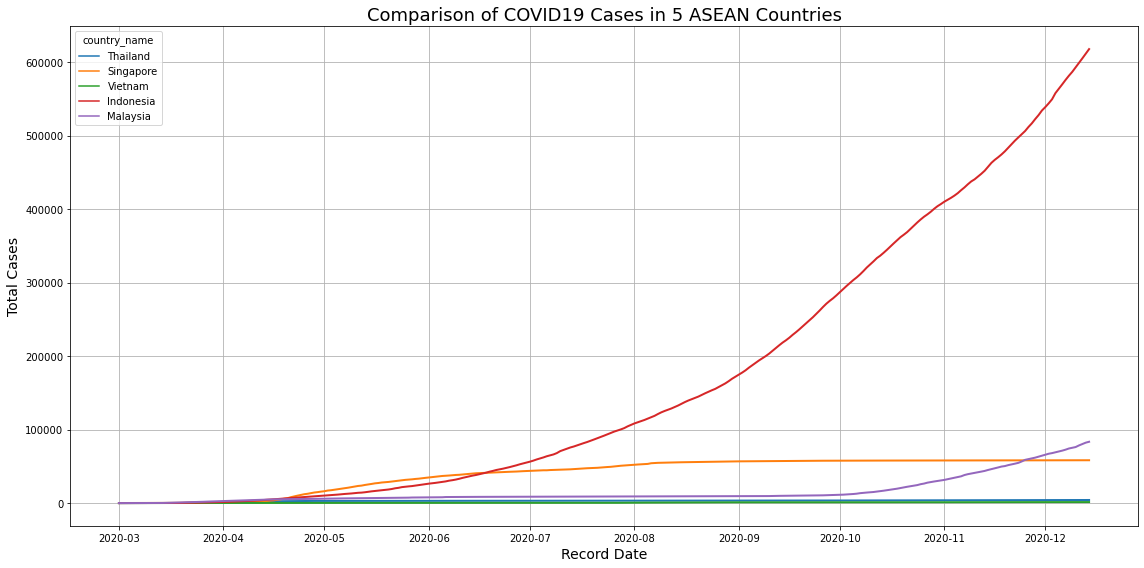

In [16]:
plt.figure(figsize=(16,8))
sns.lineplot(data=covid_merge_asean_march_onward,
x=covid_merge_asean_march_onward.index,
y="confirmed_cases",
hue="country_name",
linewidth=2)
plt.xlabel('Record Date', fontsize=14)
plt.ylabel('Total Cases', fontsize=14)
plt.title('Comparison of COVID19 Cases in 5 ASEAN Countries', color="k", fontsize=18)
plt.grid()
plt.tight_layout()
plt.show()

It can be seen that Indonesia has experienced a large increase in Covid-19 cases compared to other ASEAN countries. It is also seen that the country that has the lowest increase in the number of Covid-19 cases are Vietnam and Thailand.